# **Sun-Earth System in 2D**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.animation as animation

import IPython
from IPython.display import HTML

In [2]:
def time_evolution(x0, y0, vx0, vy0, n_steps, time_step):
    """
    Euler-Cromer solver
    """
    
    trajectory = np.zeros((n_steps, 2))
    velocity = np.zeros((n_steps, 2))

    trajectory[0, 0] = x0
    trajectory[0, 1] = y0
    velocity[0, 0] = vx0
    velocity[0, 1] = vy0

    for i in range(n_steps - 1):
        dist = np.sqrt(trajectory[i, 0]**2 + trajectory[i, 1]**2)
        f = 4*np.pi**2/dist**3
        Fx = f*trajectory[i, 0]
        Fy = f*trajectory[i, 1]
        
        velocity[i + 1, 0] = velocity[i, 0] - Fx*time_step
        velocity[i + 1, 1] = velocity[i, 1] - Fy*time_step

        trajectory[i + 1, 0] = trajectory[i, 0] + velocity[i + 1, 0]*time_step
        trajectory[i + 1, 1] = trajectory[i, 1] + velocity[i + 1, 1]*time_step

    return trajectory, velocity

## Circular orbit

In [3]:
dt = 5e-3
trajectory, velocity = time_evolution(1., 0., 0., 2.*np.pi, 1000, dt)

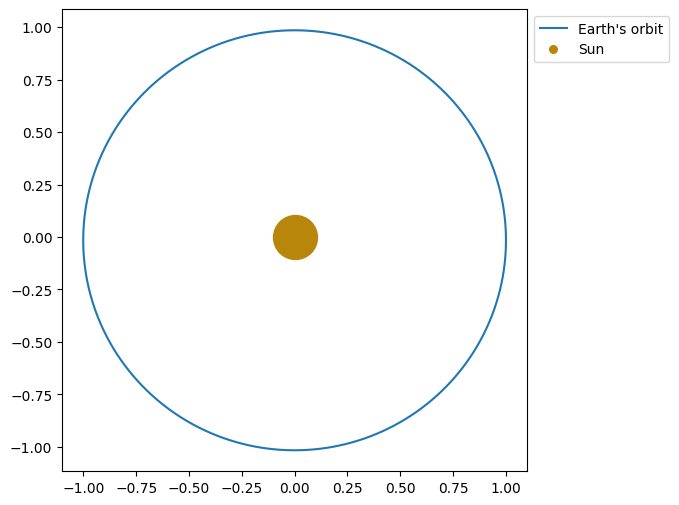

In [4]:
plt.figure(figsize=(6, 6))
plt.plot(trajectory[:201, 0], trajectory[:201, 1])
legend_elements = [Line2D([0], [0], color='tab:blue', label="Earth's orbit"),
                   Line2D([0], [0], marker='o', color='w', label='Sun', markerfacecolor='darkgoldenrod', markersize=7.5)
                  ]
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), handles=legend_elements)
plt.scatter(0,0, marker="o", c="darkgoldenrod", s = 1000)
plt.show()

In [5]:
fig, ax = plt.subplots()
orbit = ax.plot(trajectory[0, 0], trajectory[0, 1])[0]
earth = ax.scatter(trajectory.T[0], trajectory.T[1], c="b", s=5, label="Earth")
sun = ax.scatter(0,0, marker="o", c="darkgoldenrod", label="Sun", s = 1000)
ax.set_aspect('equal')
legend_elements = [Line2D([0], [0], marker='o', color='w', label='Earth', markerfacecolor='b', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='Sun', markerfacecolor='darkgoldenrod', markersize=10.5)
                  ]
ax.legend(loc='upper left', bbox_to_anchor=(1, 1), handles=legend_elements)

def update(frame):
    # update the scatter plot:
    data = np.array([trajectory[frame, 0], trajectory[frame, 1]])
    earth.set_offsets(data)
    # update the line plot:
    orbit.set_xdata(trajectory[:frame, 0])
    orbit.set_ydata(trajectory[:frame, 1])
    return (earth, orbit)


ani = animation.FuncAnimation(fig=fig, func=update, frames=200, interval = 50)
plt.close()
HTML(ani.to_jshtml())

## Energy

In [6]:
pot_energy = - 4*np.pi**2/np.sqrt((trajectory**2).sum(axis = 1))
kin_energy = 0.5*(velocity**2).sum(axis=1)
tot_energy = pot_energy + kin_energy

In [7]:
err_energy = -8*np.pi**4*dt**2/(trajectory**2).sum(axis=1)**2 + 2*np.pi**2*dt**2*((trajectory**2).sum(axis=1)*(velocity**2).sum(axis=1)-3*(trajectory*velocity).sum(axis = 1)**2)/np.sqrt((trajectory**2).sum(axis=1)**5)

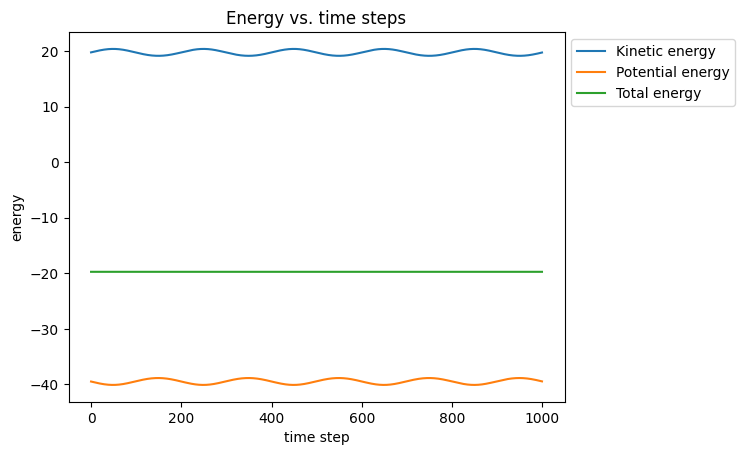

In [15]:
plt.plot(kin_energy, label = 'Kinetic energy')
plt.plot(pot_energy, label = 'Potential energy')
plt.plot(tot_energy, label = 'Total energy')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("time step")
plt.ylabel("energy")
plt.title("Energy vs. time steps")
plt.show()

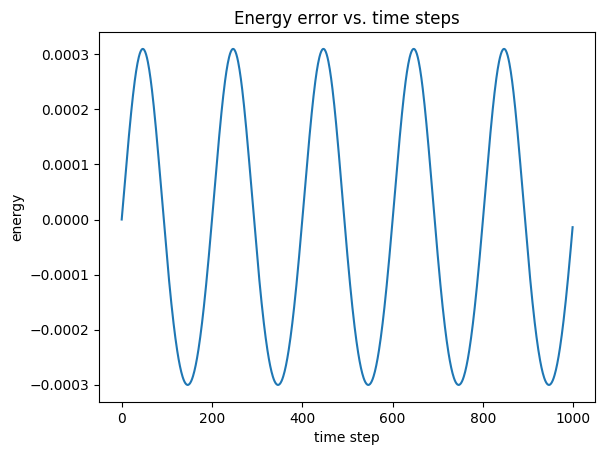

In [16]:
plt.plot(err_energy)
plt.title("Energy error vs. time steps")
plt.xlabel("time step")
plt.ylabel("energy")
plt.show()

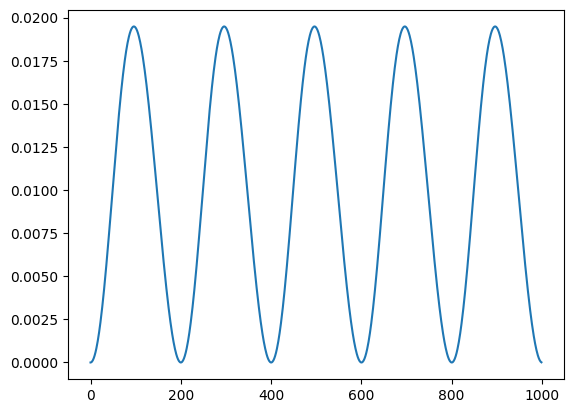

In [10]:
#plt.plot(tot_energy)
plt.plot(tot_energy - tot_energy[0])
plt.show()

In [11]:
my_energy = np.array([kin_energy[i] + pot_energy[i - 1] for i in range(1, 1000)])

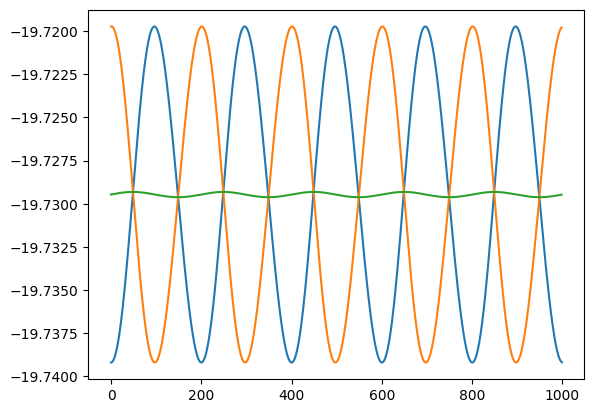

In [12]:
plt.plot(tot_energy)
plt.plot(my_energy)
plt.plot((tot_energy[:999] + my_energy)/2)
plt.show()